Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5279 - loss: 1.4519 - val_accuracy: 0.9274 - val_loss: 0.2515
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9041 - loss: 0.3240 - val_accuracy: 0.9547 - val_loss: 0.1538
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9339 - loss: 0.2256 - val_accuracy: 0.9645 - val_loss: 0.1203
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9487 - loss: 0.1781 - val_accuracy: 0.9632 - val_loss: 0.1206
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9574 - loss: 0.1504 - val_accuracy: 0.9713 - val_loss: 0.0961
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9626 - loss: 0.1321 - val_accuracy: 0.9757 - val_loss: 0.0820
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9658 - loss: 0.1159 - val_accuracy: 0.9757 - val_loss: 0.0804
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9689 - loss: 0.1066 - 

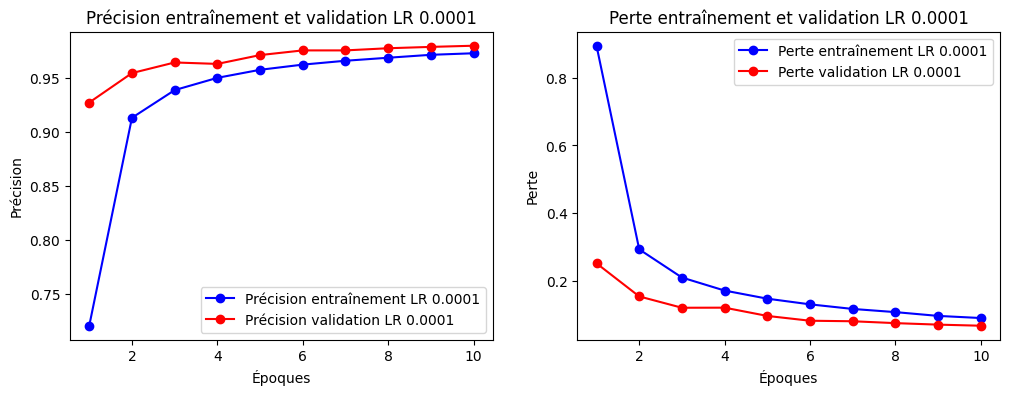

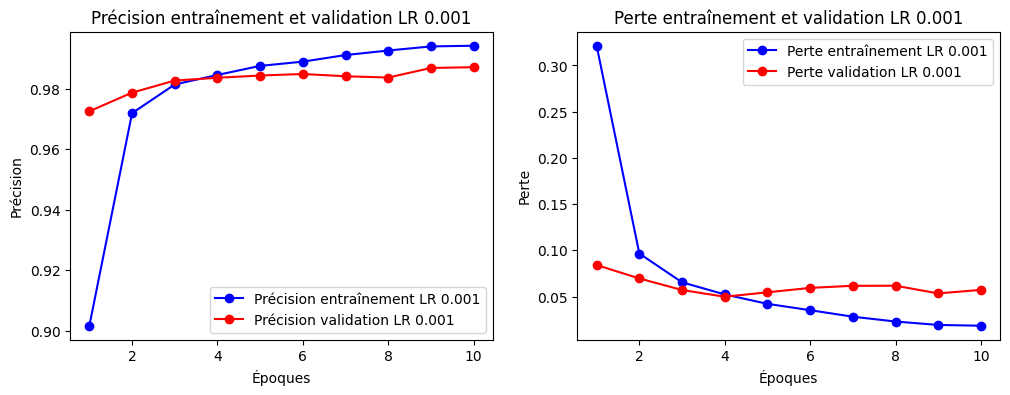

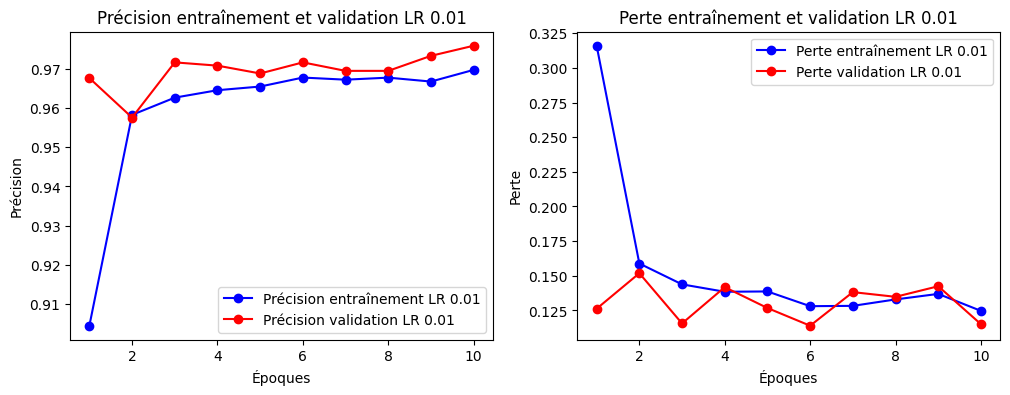

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class MNISTLoader:
    def __init__(self):
        self.x_train = None
        self.x_test = None
        self.x_val = None
        self.x_test_normalized = None
        self.x_train_normalized_80 = None
        self.x_val_normalized_20 = None
        self.y_test = None
        self.y_train_80 = None
        self.y_val_20 = None

    def load_data(self):
        (x_train, y_train), (self.x_test, self.y_test) = tf.keras.datasets.mnist.load_data()
        x_train_normalized = x_train / 255
        self.x_test_normalized = self.x_test / 255
        self.x_train, self.x_val, self.y_train_80, self.y_val_20 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
        self.x_train_normalized_80, self.x_val_normalized_20, self.y_train_80, self.y_val_20 = train_test_split(x_train_normalized, y_train, test_size=0.2, random_state=42)

loader = MNISTLoader()
loader.load_data()

def build_and_train_model(learning_rate):
    num_classes = 10
    core_size = 3

    model = Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Ajout d'une couche Dropout pour la régularisation
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  # Modification du taux d'apprentissage
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Entraîner le modèle et sauvegarder l'historique
    history = model.fit(loader.x_train_normalized_80,
                        loader.y_train_80,
                        validation_data=(loader.x_val_normalized_20, loader.y_val_20),
                        epochs=10,  # Nombre d'époques
                        batch_size=64)  # Taille du batch

    return history

# Entraîner deux modèles avec des taux d'apprentissage différents
history_lr_0_0001 = build_and_train_model(0.0001)
history_lr_0_001 = build_and_train_model(0.001)
history_lr_0_01 = build_and_train_model(0.01)

# Tracer les courbes de la précision et de la perte pour les ensembles d'entraînement et de validation
def plot_training_history(history, label):
    # Extraire les données de l'historique
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Tracer la courbe de précision
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Précision entraînement ' + label)
    plt.plot(epochs, val_acc, 'ro-', label='Précision validation ' + label)
    plt.title('Précision entraînement et validation ' + label)
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()

    # Tracer la courbe de perte
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Perte entraînement ' + label)
    plt.plot(epochs, val_loss, 'ro-', label='Perte validation ' + label)
    plt.title('Perte entraînement et validation ' + label)
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    plt.show()

# Tracer les courbes pour les deux taux d'apprentissage
plot_training_history(history_lr_0_0001, 'LR 0.0001')
plot_training_history(history_lr_0_001, 'LR 0.001')
plot_training_history(history_lr_0_01, 'LR 0.01')